In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import os
import warnings
warnings.filterwarnings('ignore')

In [4]:
theFile='../data/processed/train_heart.csv'

In [5]:
datadf = pd.read_csv(theFile)
print("Data Shape")
print(datadf.shape)
print("Data Values")
datadf.head()   

Data Shape
(242, 14)
Data Values


,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,49,0,0,130,269,0,1,163,0,0.0,2,0,2,1
1,63,0,0,108,269,0,1,169,1,1.8,1,2,2,0
2,60,1,0,130,206,0,0,132,1,2.4,1,2,3,0
3,66,1,0,120,302,0,0,151,0,0.4,1,0,2,1
4,58,1,0,114,318,0,2,140,0,4.4,0,3,1,0


In [6]:
#Missing values check
display("Feature->Missing values", datadf.isnull().sum())

'Feature->Missing values'

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [7]:
#Unique values check
unique = []
for col in datadf.columns:
    unique.append(datadf[col].value_counts().count())
                  
print(pd.DataFrame(unique, index = datadf.columns, columns=["Number of Unique Values"]))

          Number of Unique Values
age                            41
sex                             2
cp                              4
trtbps                         47
chol                          131
fbs                             2
restecg                         3
thalachh                       86
exng                            2
oldpeak                        39
slp                             3
caa                             5
thall                           4
output                          2


In [8]:
#How many men and women
print(f'Number of Men: {datadf.sex.value_counts()[1]}')
print(f'Number of Women: {datadf.sex.value_counts()[0]}')

Number of Men: 165
Number of Women: 77


In [9]:
numeric_feat = [ "age","chol","trtbps","thalachh","oldpeak" ]
category_feat = [ "sex","cp","fbs","restecg","exng","slp","caa","thall","output" ]

In [10]:
#Decsribing the numerical features
datadf[numeric_feat].describe()

,age,chol,trtbps,thalachh,oldpeak
count,242.000000,242.000000,242.000000,242.000000,242.000000
mean,54.305785,247.033058,131.388430,149.694215,1.090496
std,9.216477,51.009630,18.286957,22.338714,1.220312
min,29.000000,141.000000,94.000000,88.000000,0.000000
25%,47.000000,211.250000,120.000000,136.000000,0.000000
50%,55.000000,241.500000,130.000000,152.000000,0.800000
75%,61.000000,276.750000,140.000000,165.000000,1.750000
max,77.000000,564.000000,200.000000,202.000000,6.200000


UNIVARIATE ABALYSIS

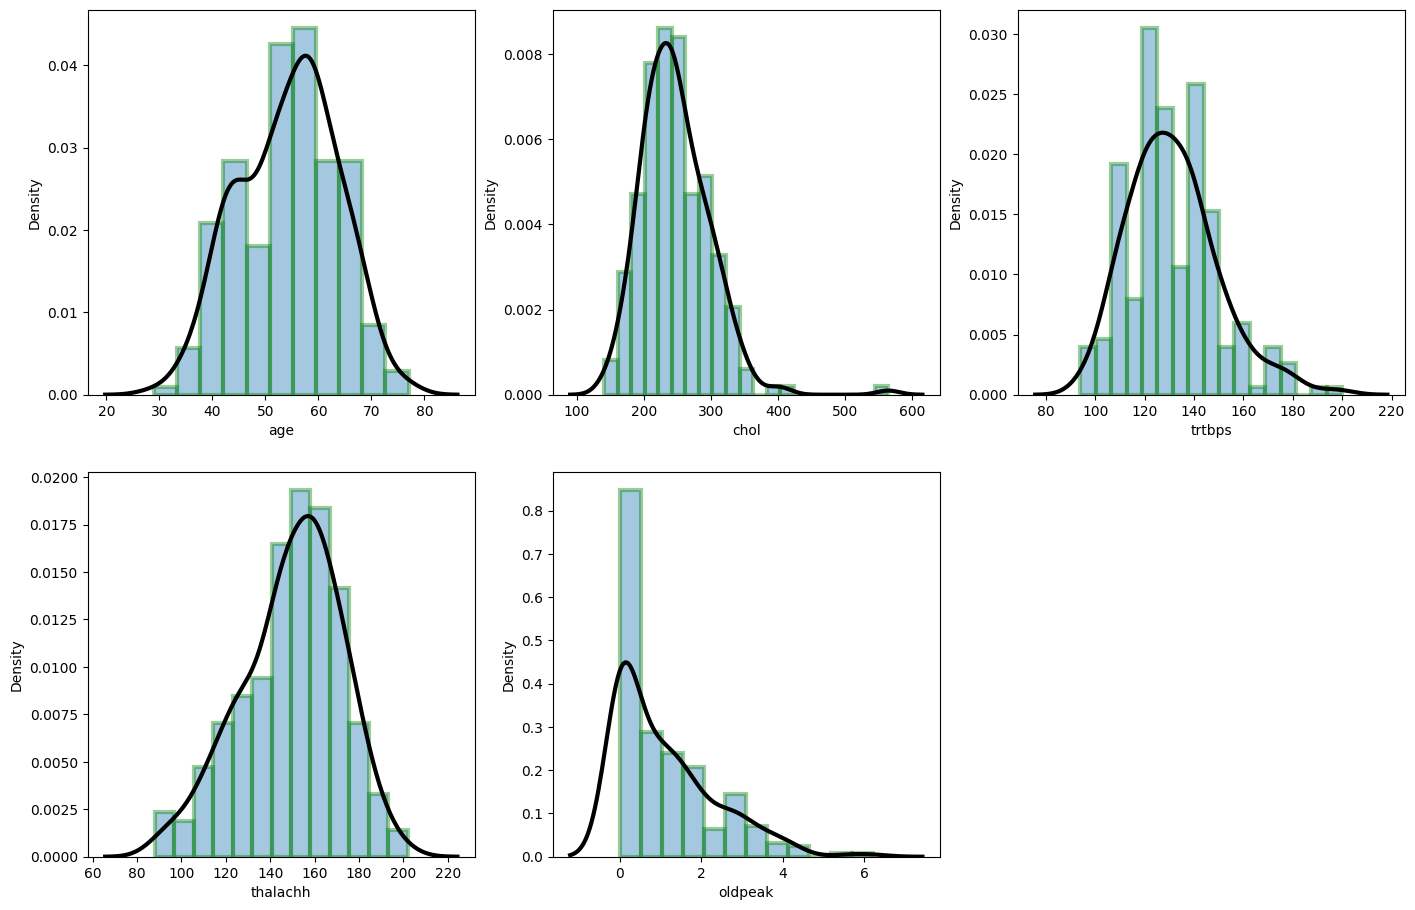

In [11]:
#Plot the distributions of numeric features

fig, axes = plt.subplots(2, 3, figsize=(17, 11))
ax = sns.distplot(datadf['age'],
                  kde_kws={"color": "k", "lw": 3, "label": "KDE"},
                  hist_kws={"linewidth": 3, "edgecolor": "g"}, ax=axes[0][0])
ax = sns.distplot(datadf['chol'],
                  kde_kws={"color": "k", "lw": 3, "label": "KDE"},
                  hist_kws={"linewidth": 3, "edgecolor": "g"}, ax=axes[0][1])
ax = sns.distplot(datadf['trtbps'],
                  kde_kws={"color": "k", "lw": 3, "label": "KDE"},
                  hist_kws={"linewidth": 3, "edgecolor": "g"}, ax=axes[0][2])
ax = sns.distplot(datadf['thalachh'],
                  kde_kws={"color": "k", "lw": 3, "label": "KDE"},
                  hist_kws={"linewidth": 3, "edgecolor": "g"}, ax=axes[1][0])
ax = sns.distplot(datadf['oldpeak'],
                  kde_kws={"color": "k", "lw": 3, "label": "KDE"},
                  hist_kws={"linewidth": 3, "edgecolor": "g"}, ax=axes[1][1])
axes[1,2].set_axis_off()

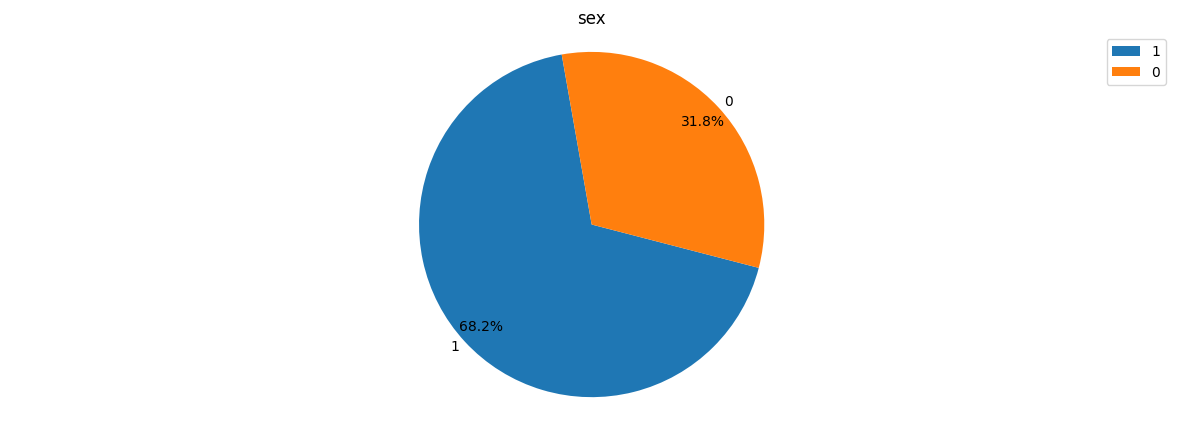

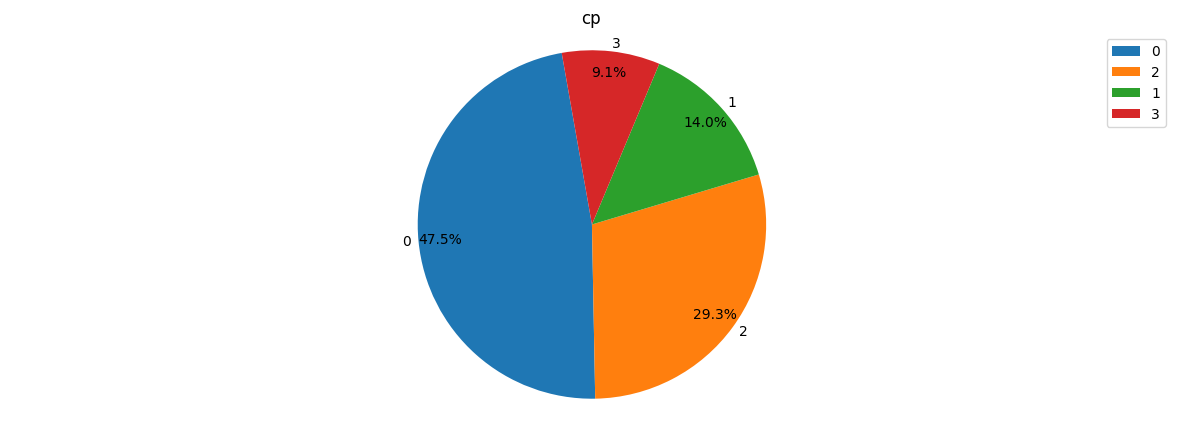

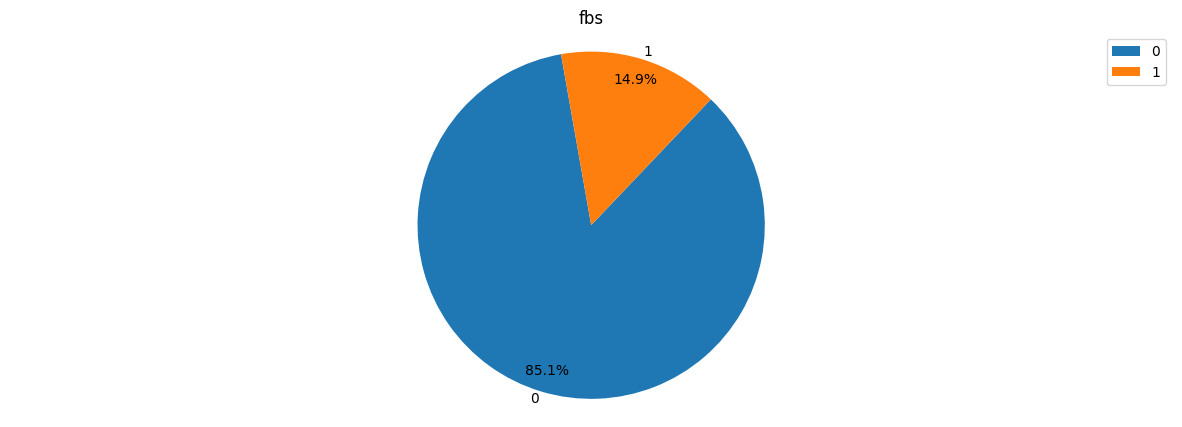

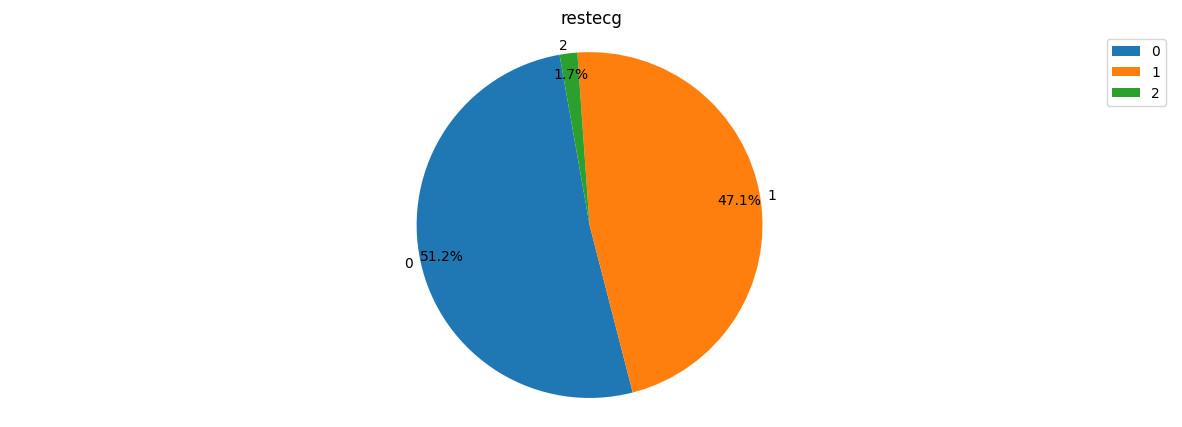

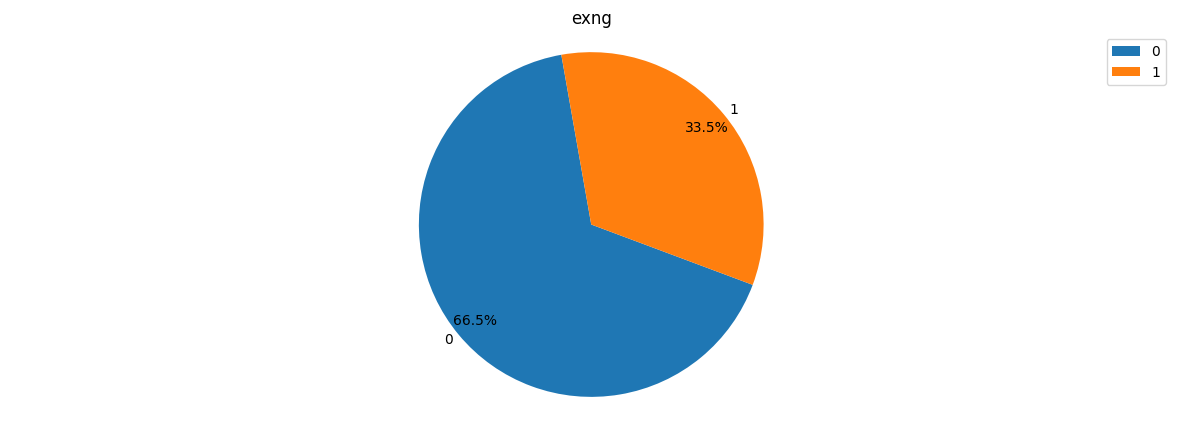

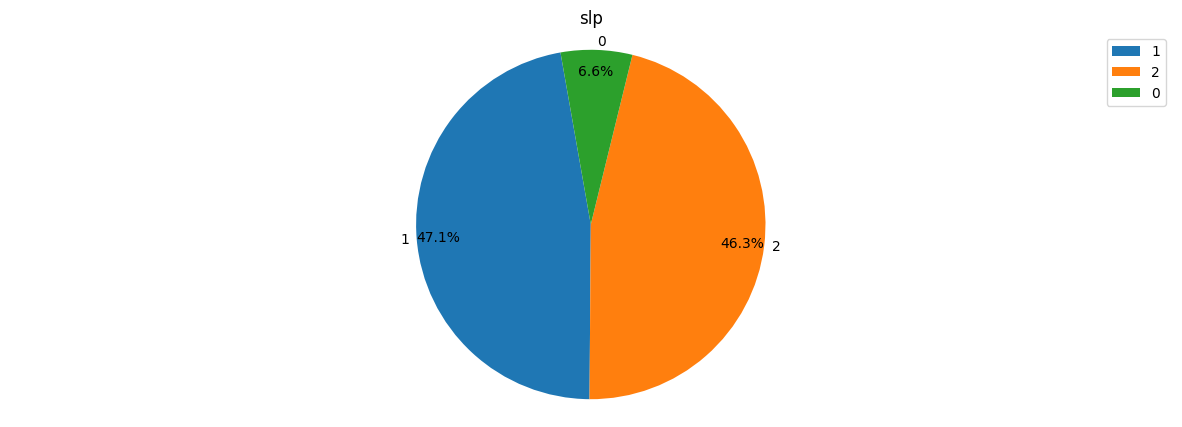

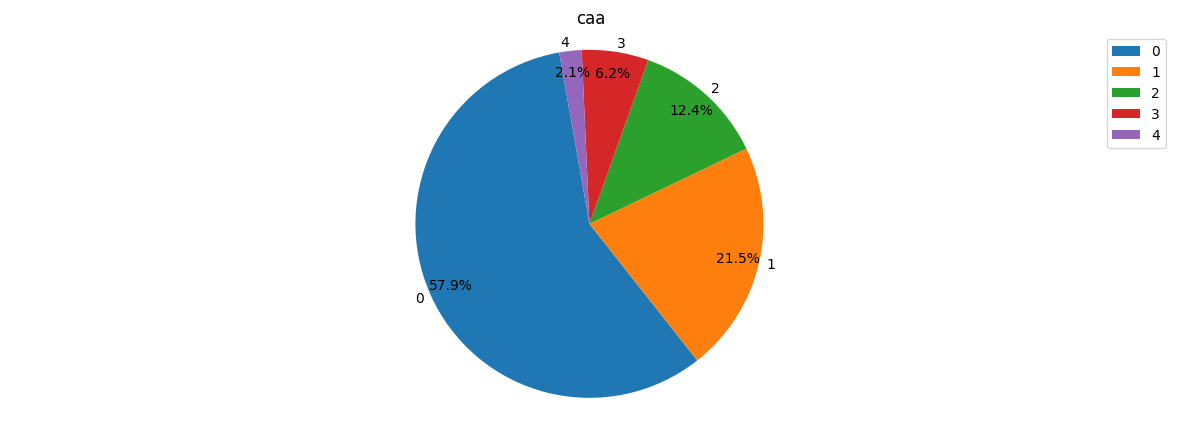

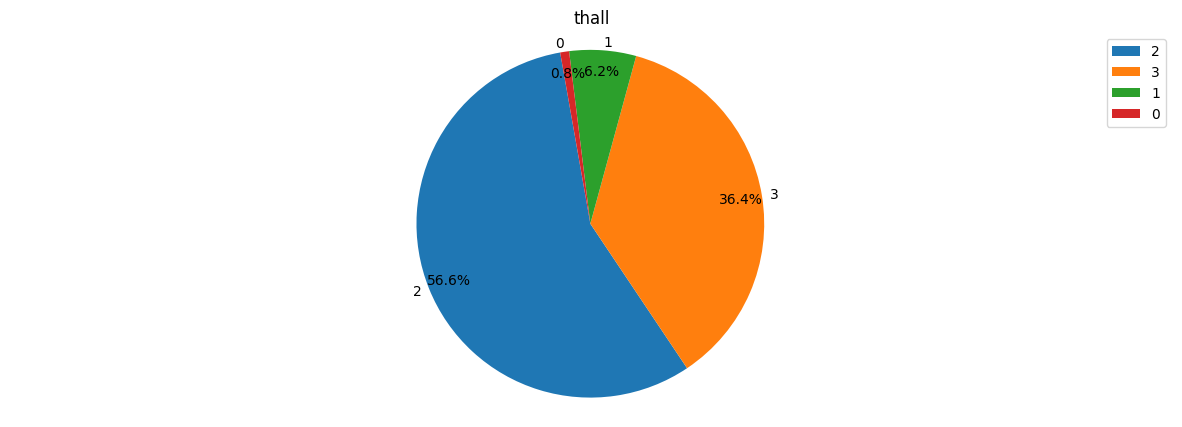

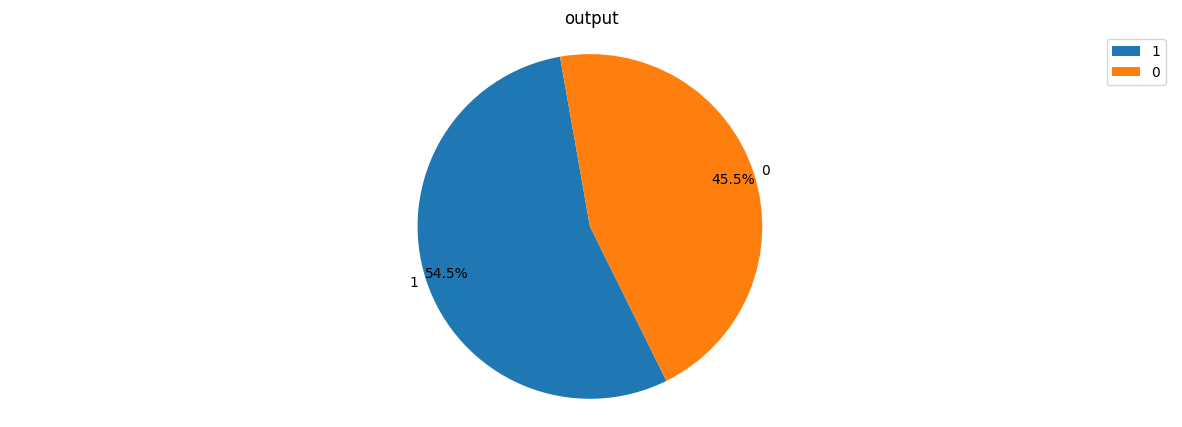

In [12]:
#Univariate Analysis of Categorical Variables
#Plotting Pie Charts

for i in list(category_feat):
    fig,ax = plt.subplots(figsize = (15,5))
    
    values = list(datadf[i].value_counts().index)
    total_values = list(datadf[i].value_counts())
    
    ax.pie(total_values, labels = values, autopct = '%1.1f%%', startangle=100,  pctdistance=0.875, labeldistance = 1.045)
    ax.axis("equal")
    
    plt.title(i)
    plt.legend()
    plt.show()

In [13]:
#There are empty(missing) values in thal variable
#handling them is required

datadf[datadf['thall'] == 0]

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
30,53,0,2,128,216,0,0,115,0,0.0,2,0,0,1
185,52,1,0,128,204,1,1,156,1,1.0,1,0,0,0


In [14]:
datadf[datadf['thall'] == 1].head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
4,58,1,0,114,318,0,2,140,0,4.4,0,3,1,0
31,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
43,44,1,0,120,169,0,1,144,1,2.8,0,0,1,0
69,57,1,0,150,276,0,0,112,1,0.6,1,1,1,0
86,59,1,0,164,176,1,0,90,0,1.0,1,2,1,0


In [15]:
datadf[datadf['thall'] == 2].head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,49,0,0,130,269,0,1,163,0,0.0,2,0,2,1
1,63,0,0,108,269,0,1,169,1,1.8,1,2,2,0
3,66,1,0,120,302,0,0,151,0,0.4,1,0,2,1
6,77,1,0,125,304,0,0,162,1,0.0,2,3,2,0
10,52,1,1,120,325,0,1,172,0,0.2,2,0,2,1


In [16]:
datadf[datadf['thall'] == 3].head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
2,60,1,0,130,206,0,0,132,1,2.4,1,2,3,0
5,62,1,1,120,281,0,0,103,0,1.4,1,1,3,0
7,62,0,0,160,164,0,0,145,0,6.2,0,3,3,0
8,40,1,3,140,199,0,1,178,1,1.4,2,0,3,1
9,60,1,0,117,230,1,1,160,1,1.4,2,2,3,0


In [17]:
#We would like change thall value from missing to either 1,2,3
#Data values with thall=1,2,3 doest give meaningful similarties with thall=0
#We decide to go change it with the most frequent observation thall=2

datadf['thall'] = datadf['thall'].replace(0,np.nan)
datadf['thall'].fillna((int)(2), inplace=True)
display(datadf.loc[[40,80], : ])
print("thall type -> count ")
print(datadf['thall'].value_counts())

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
40,54,0,1,132,288,1,0,159,1,0.0,2,1,2.0,1
80,44,1,1,120,220,0,1,170,0,0.0,2,0,2.0,1


thall type -> count 
2.0    139
3.0     88
1.0     15
Name: thall, dtype: int64


In [18]:
#Bivariate analysis of numerical features with target variable
#Use FacetGrid
numeric_feat.append('output')

numeric_feat

['age', 'chol', 'trtbps', 'thalachh', 'oldpeak', 'output']

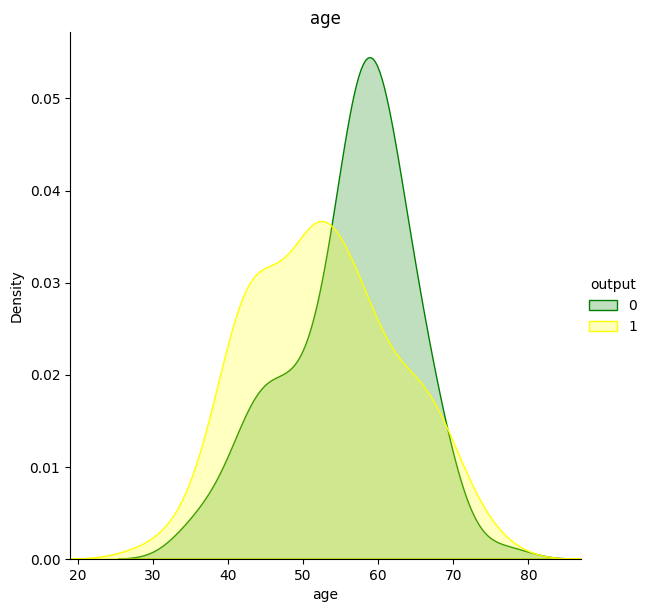

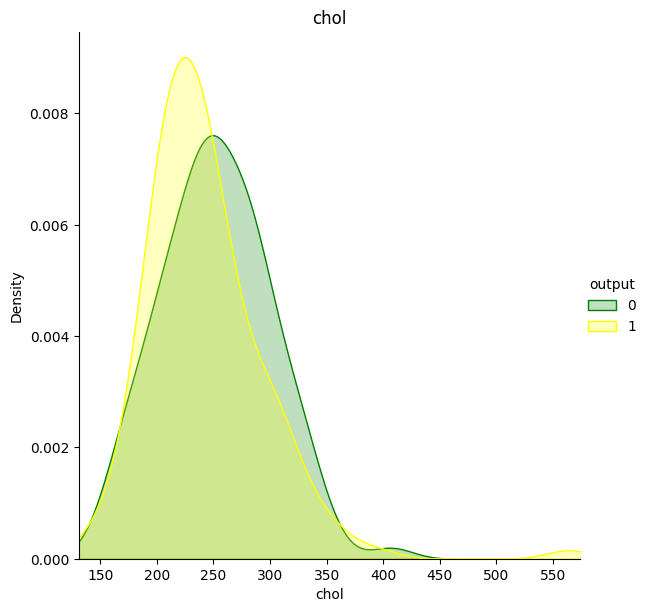

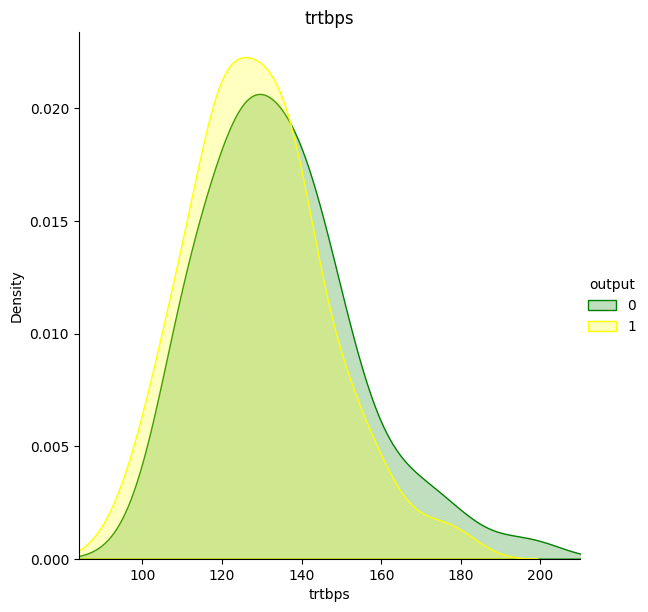

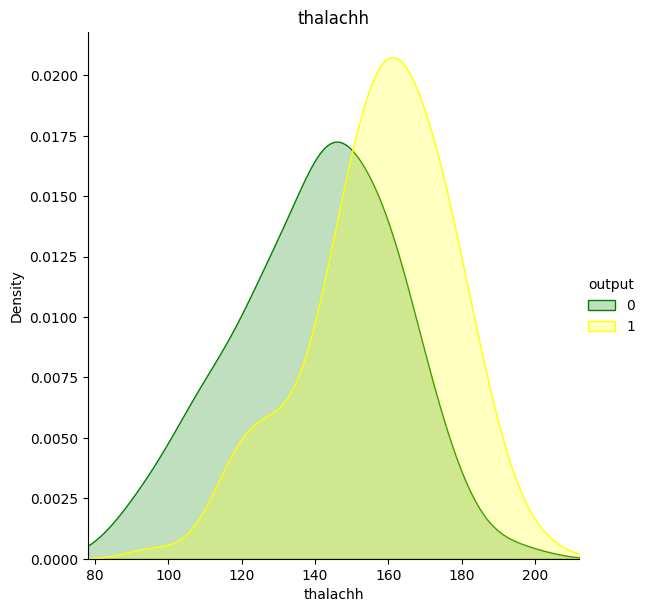

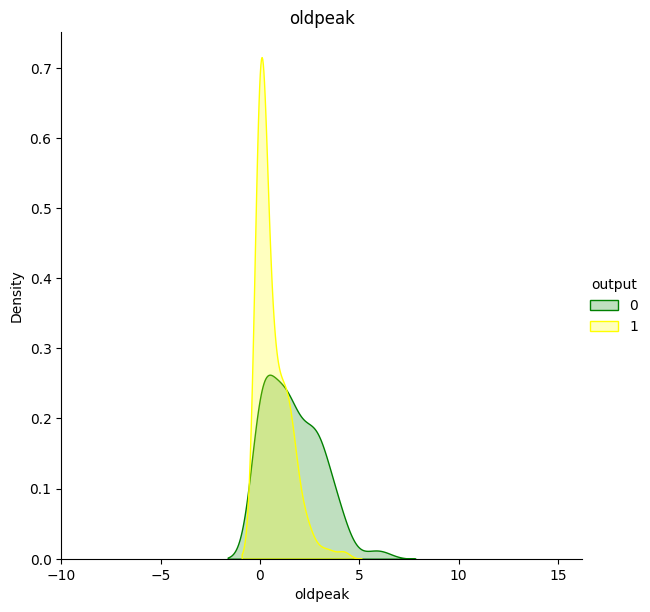

In [19]:
for i in list(numeric_feat): 
    if i != 'output':
        graph = sns.FacetGrid(datadf[numeric_feat], hue='output', 
                              height=6, 
                              hue_kws={'color': ['green', 'yellow']},
                          xlim = ((datadf[i].min()-10) , 
                                  (datadf[i].max()+10)))
        graph.map(sns.kdeplot, i, shade=True)
        graph.add_legend()
    
        plt.title(i)
        plt.show()

In [20]:
#See the correlation values
datadf[numeric_feat].corr().iloc[:, [-1]]

,output
age,-0.189811
chol,-0.090540
trtbps,-0.142916
thalachh,0.392880
oldpeak,-0.415323
output,1.000000


In [21]:
#See the correlation values
datadf[category_feat].corr().iloc[:, [-1]]

,output
sex,-0.249444
cp,0.421156
fbs,0.008480
restecg,0.131881
exng,-0.425271
slp,0.362642
caa,-0.374437
thall,-0.370393
output,1.000000


In [22]:
from sklearn.preprocessing import RobustScaler
robust_scaler = RobustScaler()

In [23]:
datadf2 = datadf.copy(deep = True)

In [24]:
df_heat = pd.concat([datadf, datadf[category_feat]], axis = 1)

In [25]:
numeric_feat.remove('output')

In [26]:
scaled_data = robust_scaler.fit_transform(datadf2[numeric_feat])
df_scaled = pd.DataFrame(scaled_data, columns = numeric_feat)
df_scaled.head(10)

,age,chol,trtbps,thalachh,oldpeak
0,-0.428571,0.419847,0.00,0.379310,-0.457143
1,0.571429,0.419847,-1.10,0.586207,0.571429
2,0.357143,-0.541985,0.00,-0.689655,0.914286
3,0.785714,0.923664,-0.50,-0.034483,-0.228571
4,0.214286,1.167939,-0.80,-0.413793,2.057143
5,0.500000,0.603053,-0.50,-1.689655,0.342857
6,1.571429,0.954198,-0.25,0.344828,-0.457143
7,0.500000,-1.183206,1.50,-0.241379,3.085714
8,-1.071429,-0.648855,0.50,0.896552,0.342857
9,0.357143,-0.175573,-0.65,0.275862,0.342857


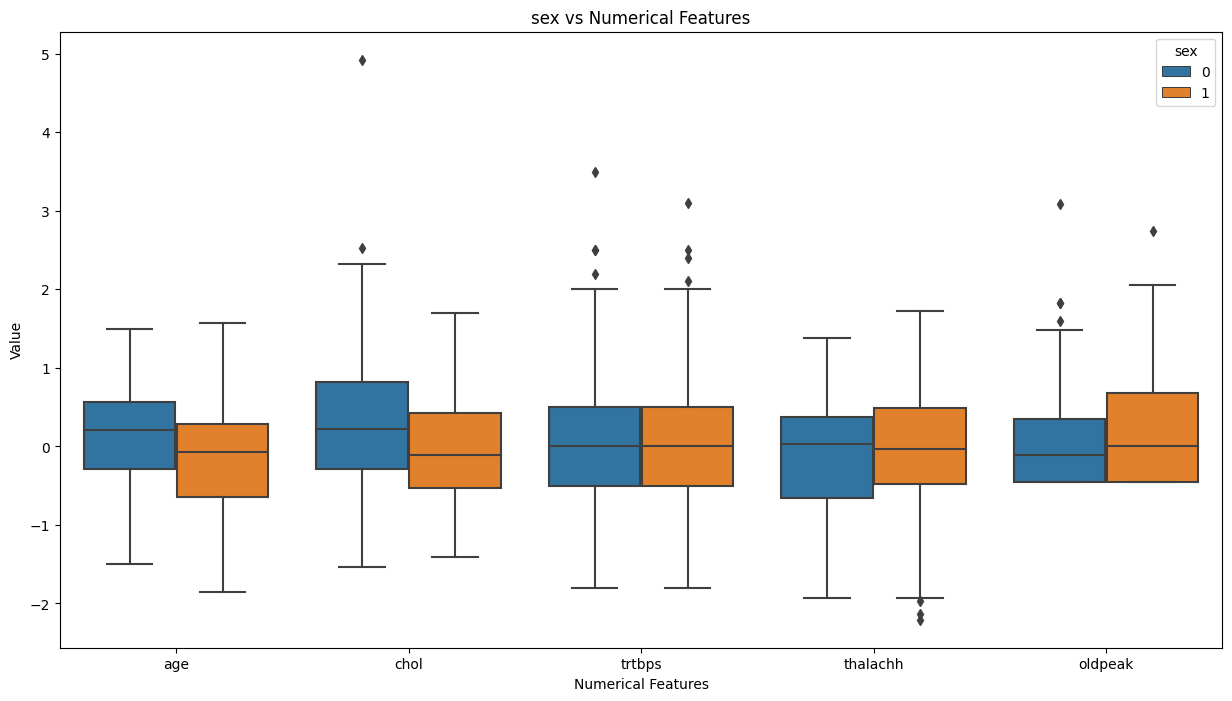

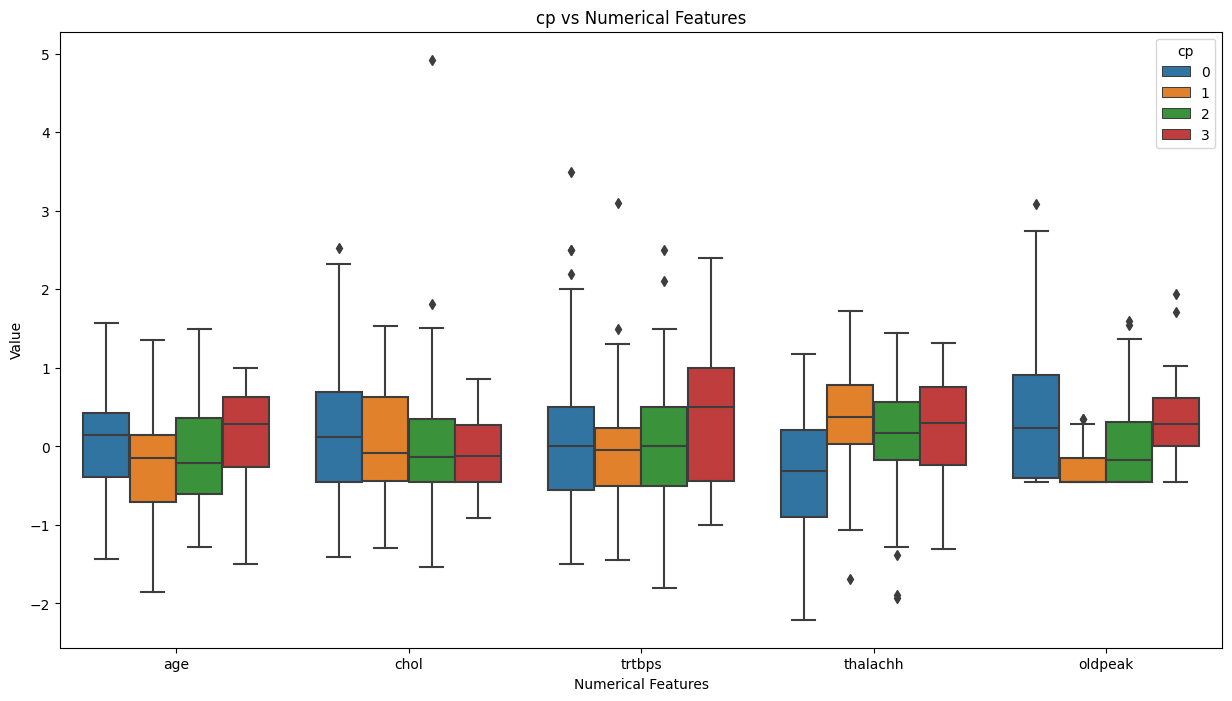

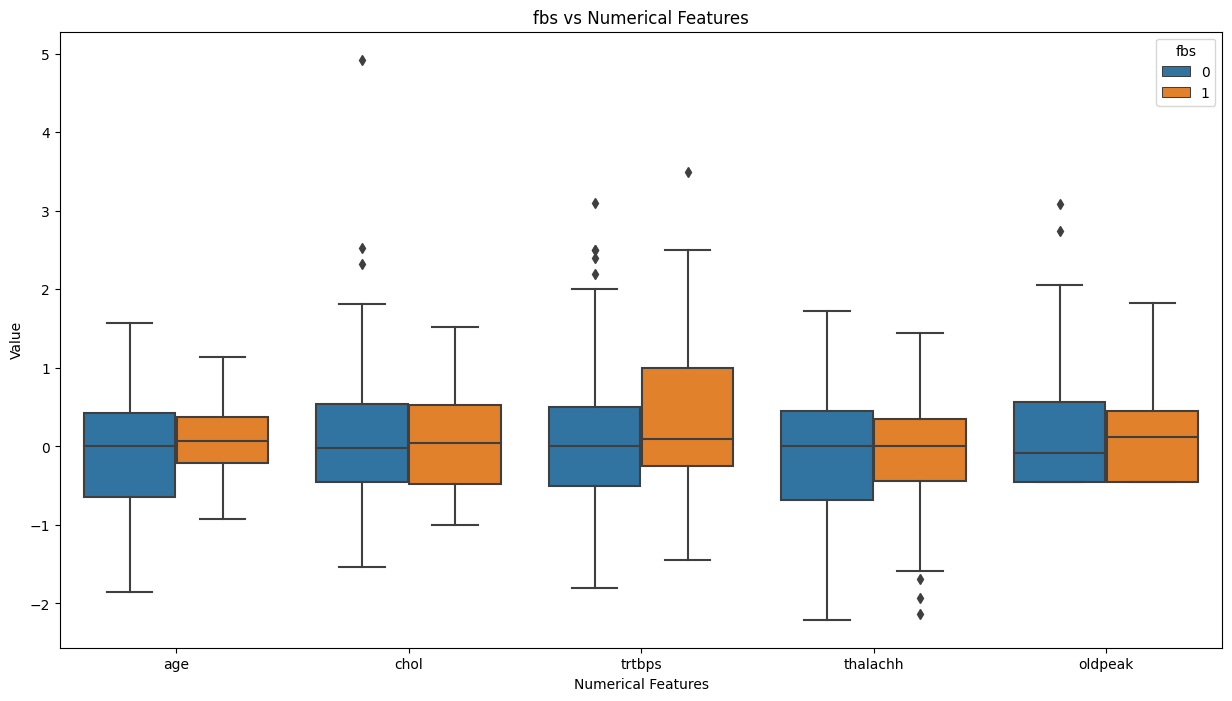

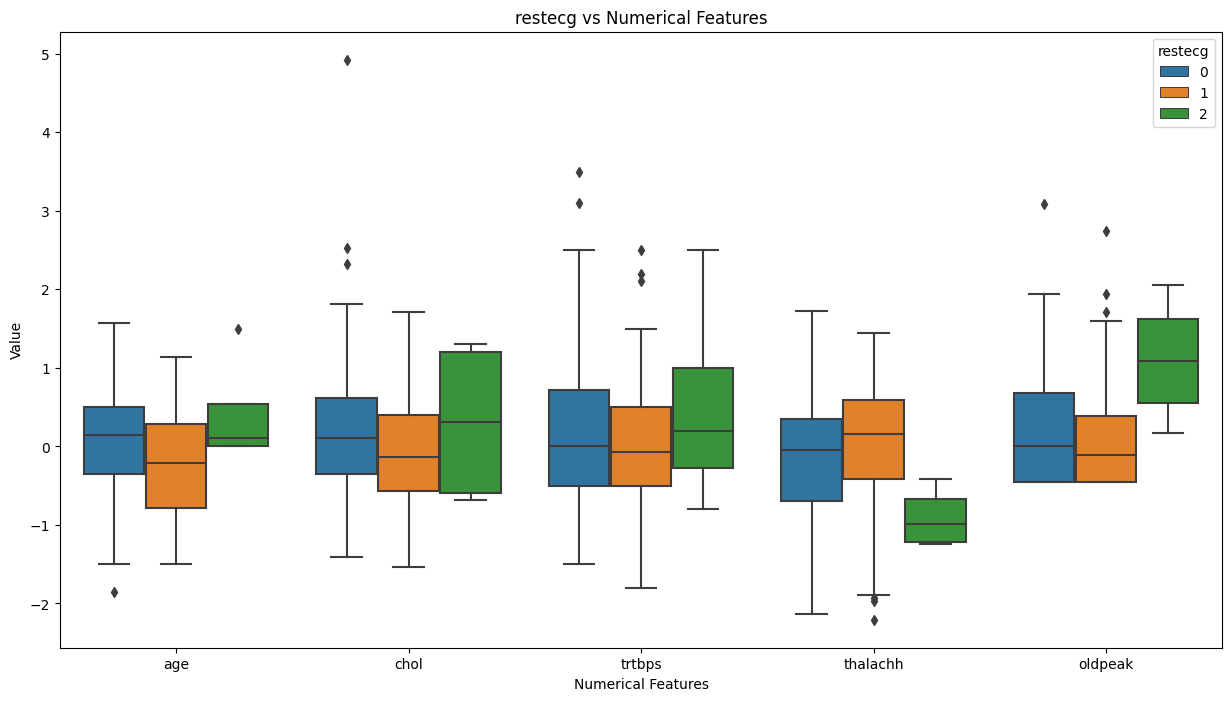

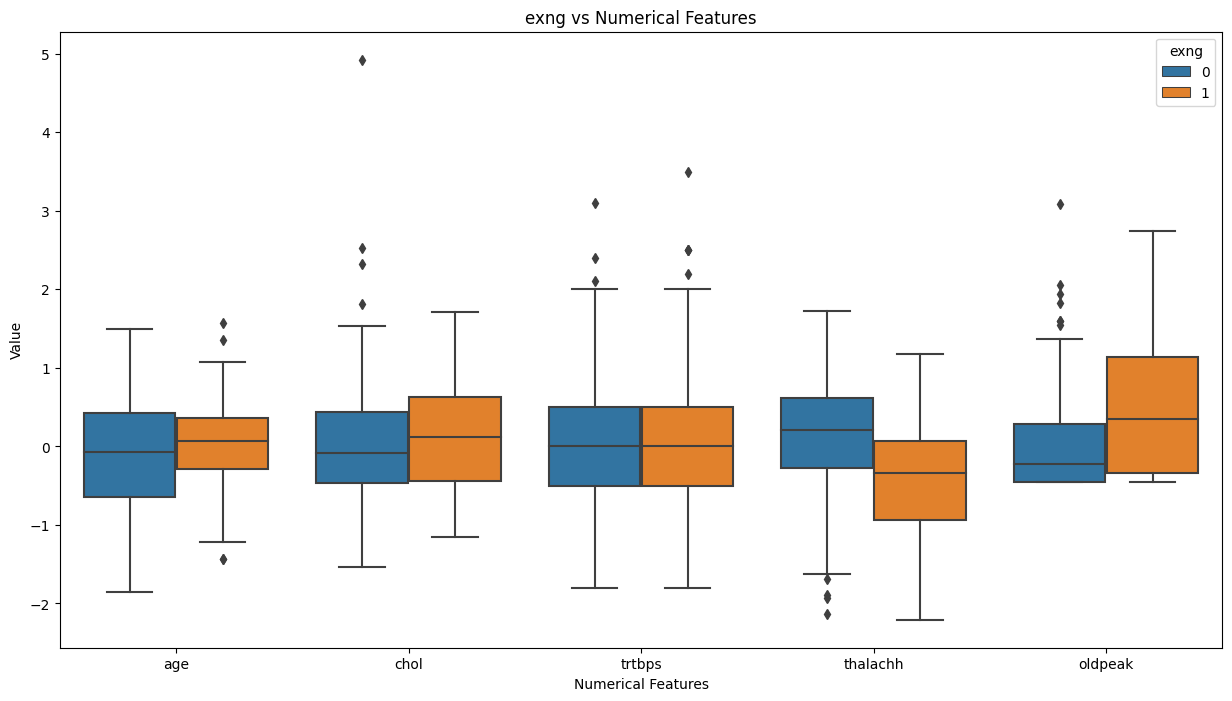

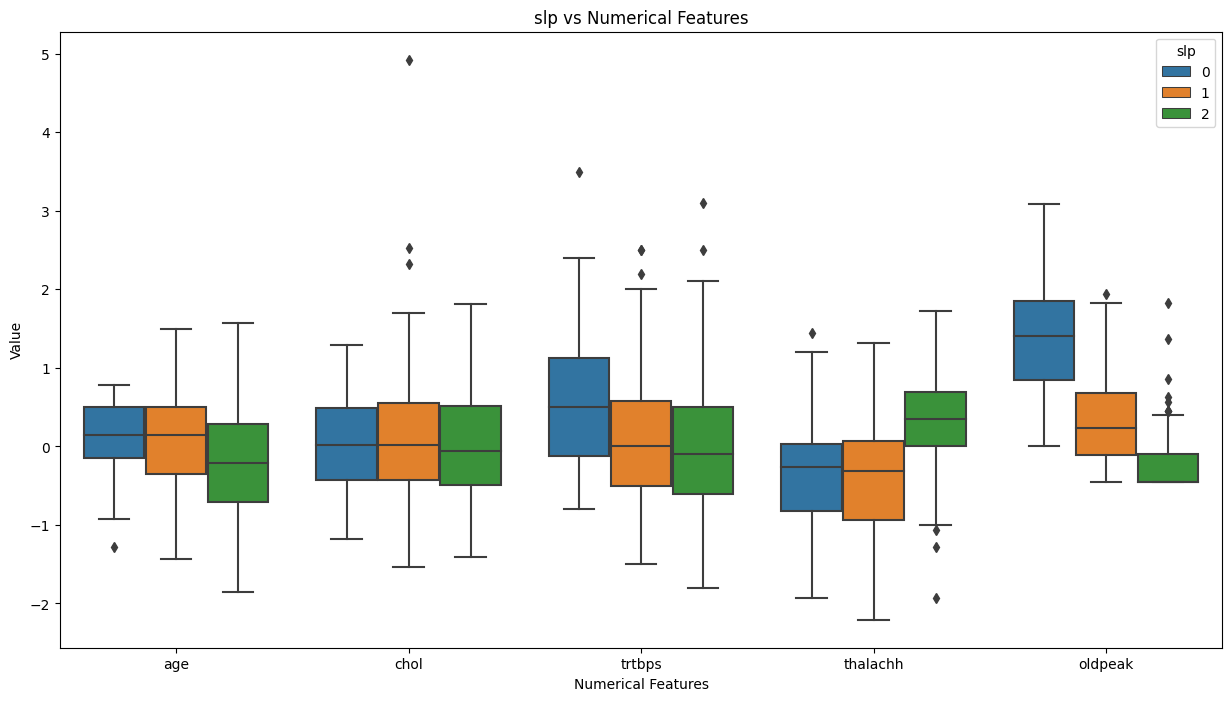

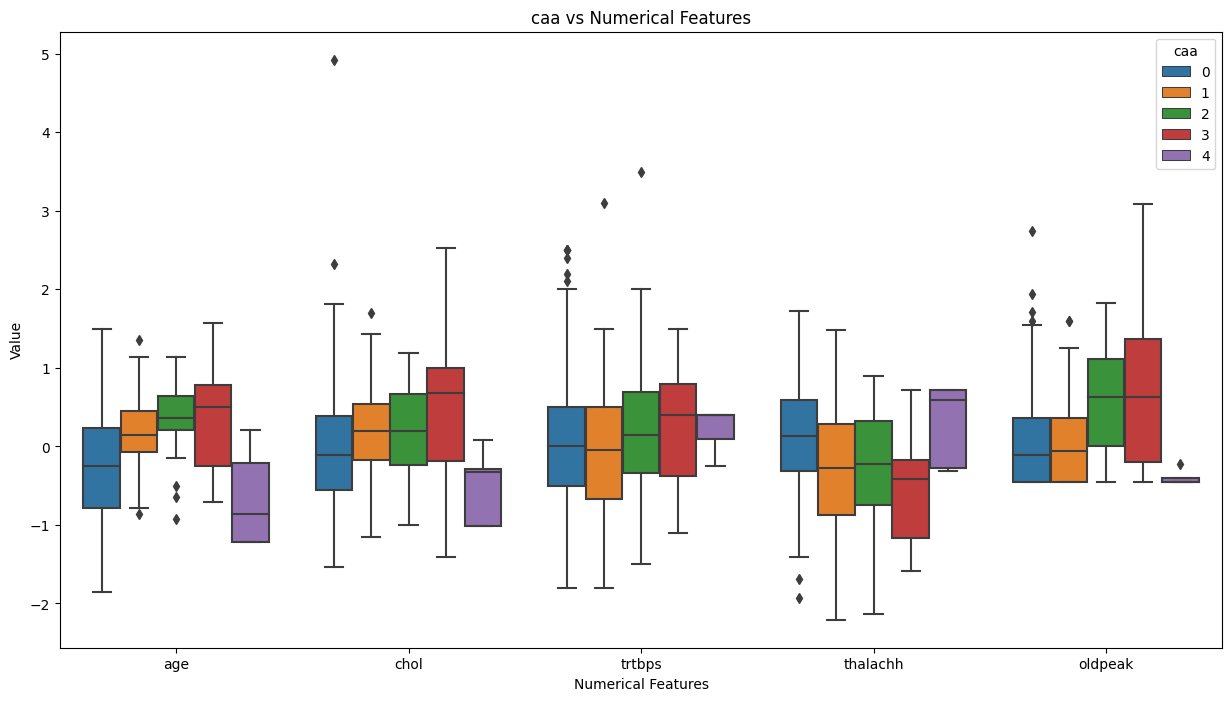

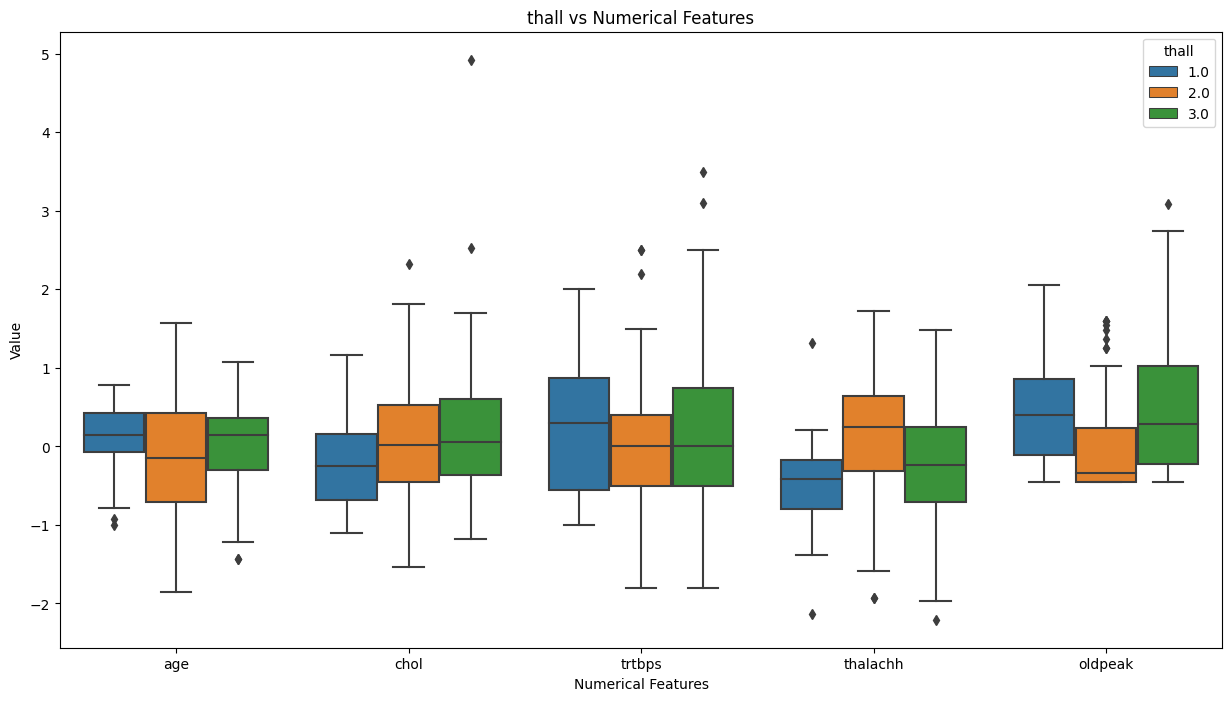

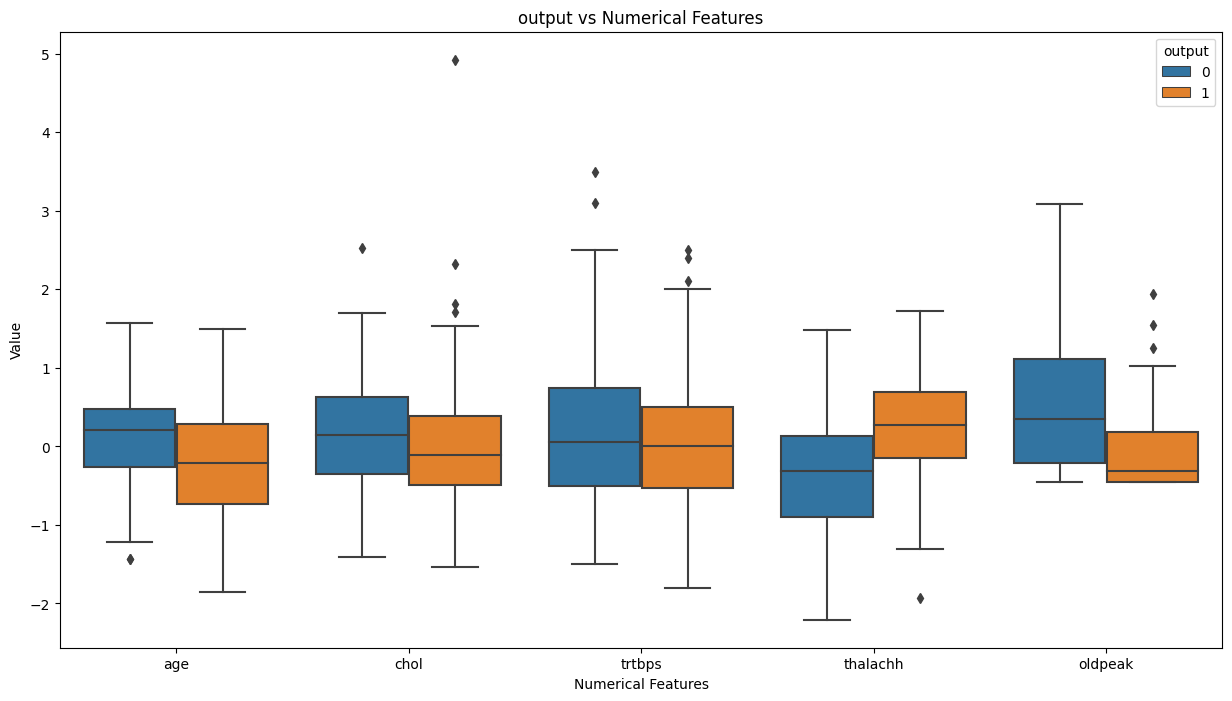

In [27]:
#Analysis of Numerical-Categorical Features
#Using a Box Plot
for i in datadf[category_feat]:
    df2 = pd.concat([df_scaled, datadf.loc[:, i]], axis = 1)
    mdf2 = pd.melt(df2, id_vars = i, var_name = "features", value_name = "value")
    
    plt.figure(figsize = (15,8))
    sns.boxplot(x = "features", y = "value", hue = i, data = mdf2)
    
    plt.title(f'{i} vs Numerical Features')
    plt.xlabel("Numerical Features")
    plt.ylabel("Value")
    
    plt.show()  

In [28]:
df_heat = pd.concat([df_scaled, datadf[category_feat]], axis = 1)

<AxesSubplot:>

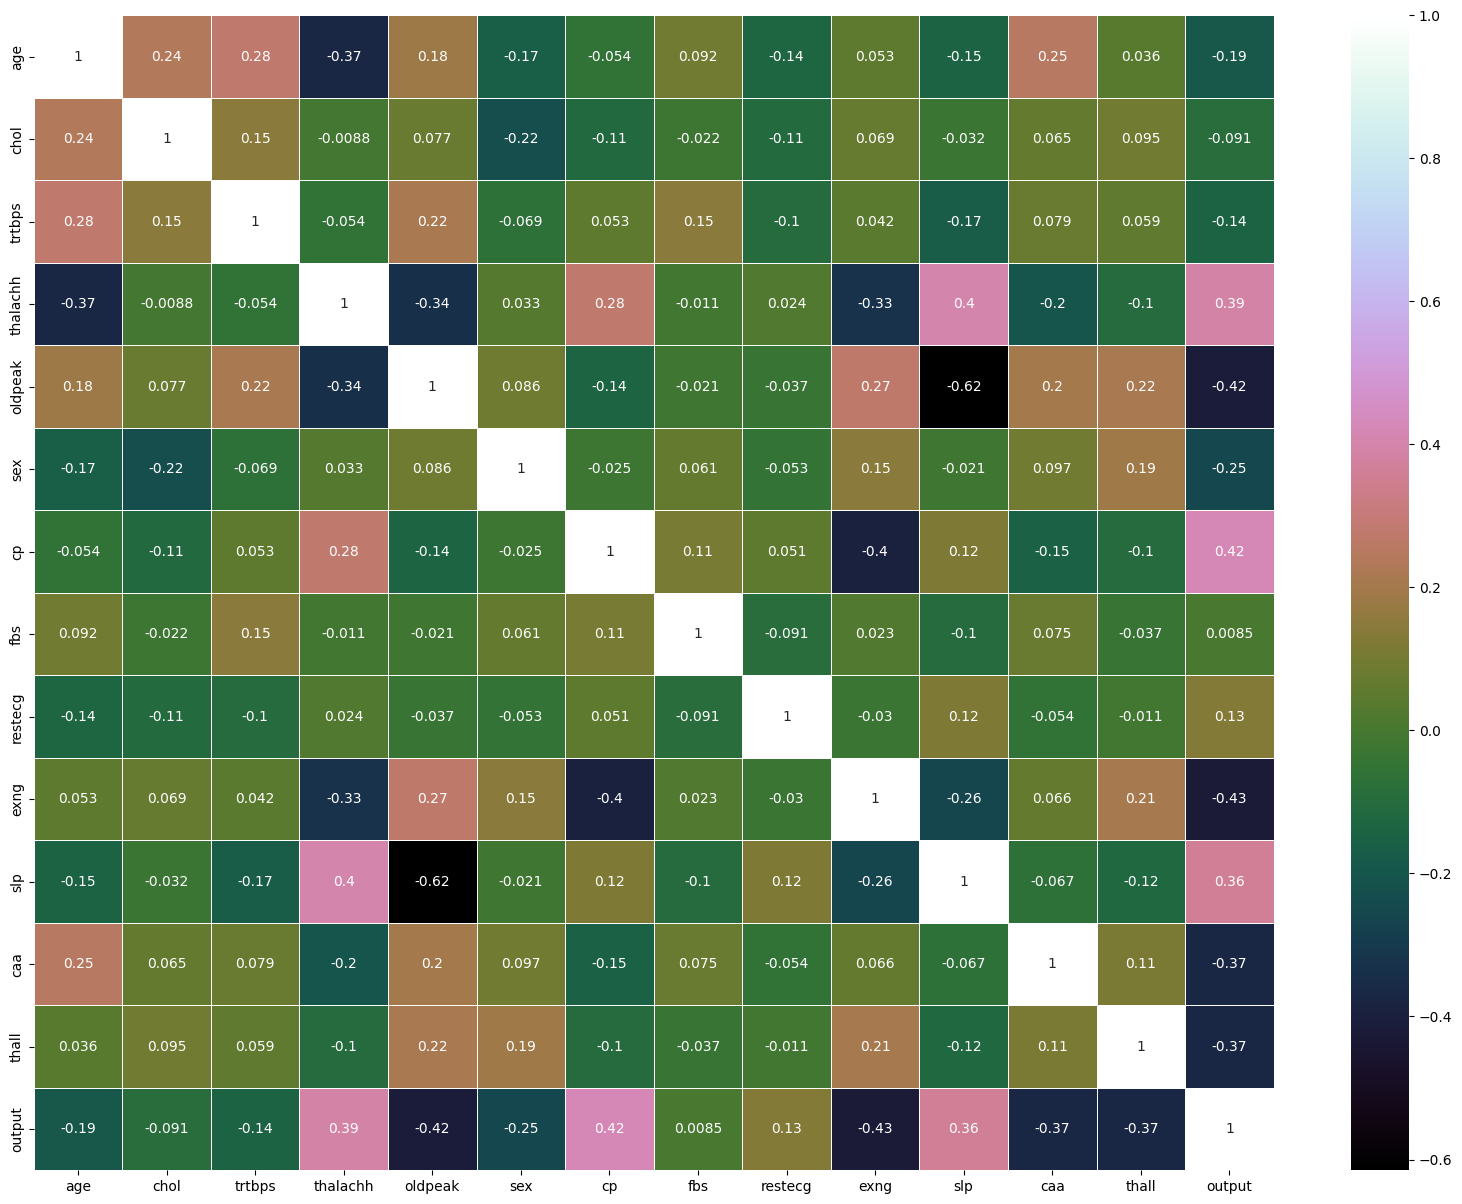

In [29]:
plt.figure(figsize = (20,15))
sns.heatmap(data = df_heat.corr(), cmap="cubehelix", annot = True, linewidth = 0.5)

In [ ]:
#Creating a schema for the database

In [34]:
overview = datadf.describe()

In [35]:
overview.loc[["min", "max"]].to_json("schema_in.json")